In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from utils import *
import os
from scipy.sparse.linalg import lsqr
from scipy.sparse import csr_matrix
from scipy.sparse import lil_matrix
import utils_proj1

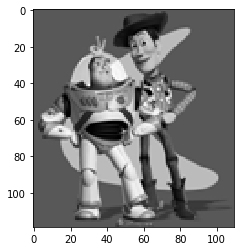

In [2]:
toy_img = cv2.cvtColor(cv2.imread('samples/toy_problem.png'), cv2.COLOR_BGR2RGB)
toy_img = cv2.cvtColor(toy_img, cv2.COLOR_BGR2GRAY).astype('double') / 255.0
#toy_img = np.repeat(res_ch1[:,:,np.newaxis],3,axis=2)
plt.imshow(toy_img, cmap="gray")

## Part 1 Toy Problem (20 pts)

In [3]:
def toy_reconstruct(toy_img):
    """
    The implementation for gradient domain processing is not complicated, but it is easy to make a mistake, so let's start with a toy example. Reconstruct this image from its gradient values, plus one pixel intensity. Denote the intensity of the source image at (x, y) as s(x,y) and the value to solve for as v(x,y). For each pixel, then, we have two objectives:
    1. minimize (v(x+1,y)-v(x,y) - (s(x+1,y)-s(x,y)))^2
    2. minimize (v(x,y+1)-v(x,y) - (s(x,y+1)-s(x,y)))^2
    Note that these could be solved while adding any constant value to v, so we will add one more objective:
    3. minimize (v(1,1)-s(1,1))^2
    
    :param toy_img: numpy.ndarray
    """
    im_h, im_w = toy_img.shape
    im = toy_img.copy()
    im2var = np.arange(im_h * im_w).reshape(im_h, im_w)
    
    A = np.zeros((2*im_h*im_w - (im_h + im_w) + 1,im_h*im_w),dtype = np.float64)
    b = np.zeros((2*im_h*im_w - (im_h + im_w) + 1,1),dtype = np.float64)
    
    e = 0
    
    A[e][im2var[0][0]] = 1
    b[e] = im[0][0]
    
    e = e + 1
    
    for y in range(0,im_h):
        for x in range(0,im_w):
            
            
            
            if x+1 < im_w:
                A[e, im2var[y][x+1]] = 1
                A[e, im2var[y][x]] = -1
                b[e] = im[y][x+1] - im[y][x]
                e = e + 1
                
                        
            if y+1 < im_h:
                A[e,im2var[y + 1][x]] = 1
                A[e, im2var[y][x]] = -1
                b[e] = im[y + 1][x] - im[y][x]
                e = e + 1
            
    v = lsqr(csr_matrix(A, dtype=np.float64), b, atol=1e-14, btol=1e-14)
    out_img = np.resize(v[0],(im_h, im_w))
    #out_img = np.stack((out_img, out_img, out_img), axis=2)
    
    return out_img
            
    
#     print(A.shape)
#     print(b.shape)
    

In [4]:
im_out = toy_reconstruct(toy_img)
if im_out.any():
    print("Error is: ", np.sqrt(((im_out - toy_img)**2).sum()))

if(np.sqrt(((im_out - toy_img)**2).sum()) < 1e-8):
    print("Success")
else:
    print("Failure")
    


Error is:  2.0945710497558806e-10
Success


In [5]:
diff = np.zeros((toy_img.shape[0],toy_img.shape[1]))
print(toy_img.shape)
for i in range(toy_img.shape[0]):
    for j in range(toy_img.shape[1]):
        diff[i][j] = toy_img[i][j] - im_out[i,j]

print(diff)

(119, 110)
[[-5.18585175e-13 -8.40161274e-13 -9.76774217e-13 ...  1.49658064e-13
   7.49955653e-14 -6.94444502e-14]
 [-7.21922522e-13 -8.45490344e-13 -9.20097332e-13 ...  1.92235117e-13
   4.74620343e-14 -1.68753900e-14]
 [-6.87783164e-13 -7.70994379e-13 -7.56172902e-13 ...  2.62401212e-13
   1.65645275e-13  1.06359366e-13]
 ...
 [ 2.73747691e-12  2.81275003e-12  2.90467650e-12 ...  7.15594251e-13
   9.30366895e-13  9.93760629e-13]
 [ 2.69384515e-12  2.78788104e-12  2.89385182e-12 ...  8.97726338e-13
   1.01985087e-12  1.14508403e-12]
 [ 2.66847655e-12  2.74202883e-12  2.81841217e-12 ...  1.06054054e-12
   1.24839028e-12  1.28563826e-12]]


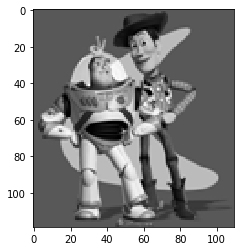

In [6]:
plt.imshow(im_out,cmap = "gray")

## Preparation

(427, 640, 3)


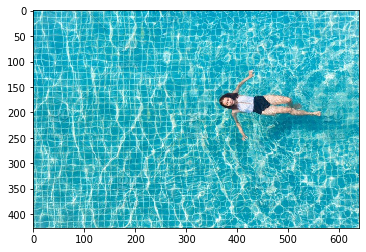

In [7]:
# Feel free to change image
background_img = cv2.cvtColor(cv2.imread('samples/pool.JPG'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
plt.figure()
plt.imshow(background_img)
print(background_img.shape)

(269, 478, 3)
If it doesn't get you to the drawing mode, then rerun this function again.


<IPython.core.display.Javascript object>


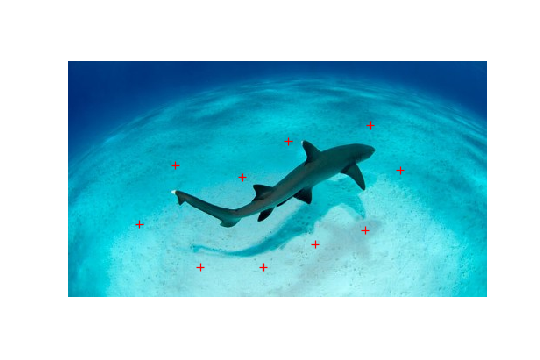

[]


In [9]:
# Feel free to change image
object_img = cv2.cvtColor(cv2.imread('samples/shark.jpg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
#object_img = cv2.resize(object_img,(300,250))
print(object_img.shape)
import matplotlib.pyplot as plt
%matplotlib notebook
mask_coords = specify_mask(object_img)
print(mask_coords)

<Figure size 432x288 with 0 Axes>

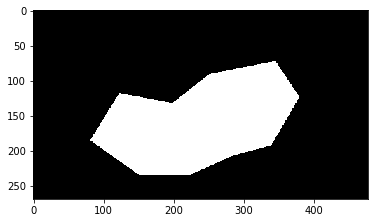

In [10]:
xs = mask_coords[0]
ys = mask_coords[1]
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
mask = get_mask(ys, xs, object_img)
#mask = cv2.blur(mask,(10,10),cv2.BORDER_DEFAULT)

# print(xs)
# print(ys)

If it doesn't get you to the drawing mode, then rerun this function again. Also, make sure the object fill fit into the background image. Otherwise it will crash


<IPython.core.display.Javascript object>


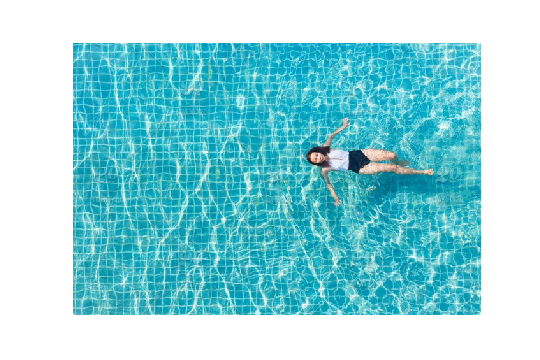

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
bottom_center = specify_bottom_center(background_img)


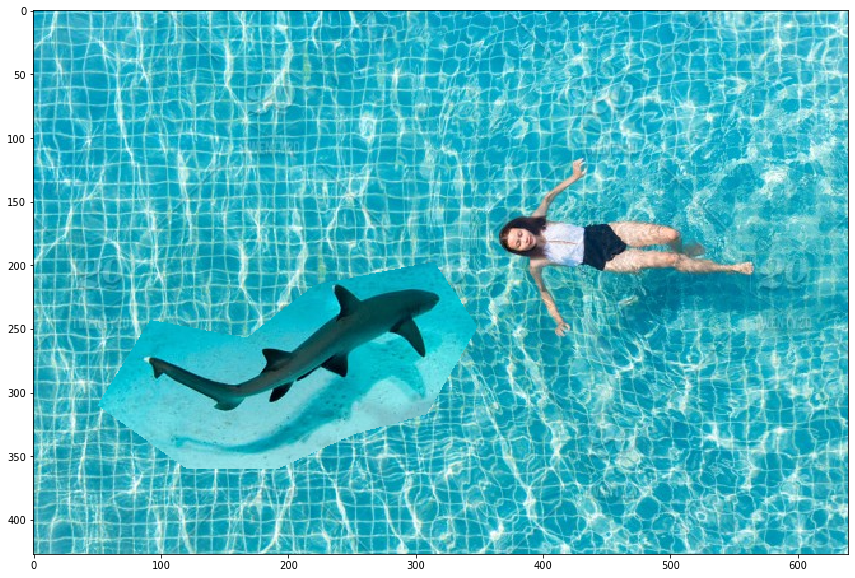

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
cropped_object, object_mask = align_source(object_img, mask, background_img, bottom_center)



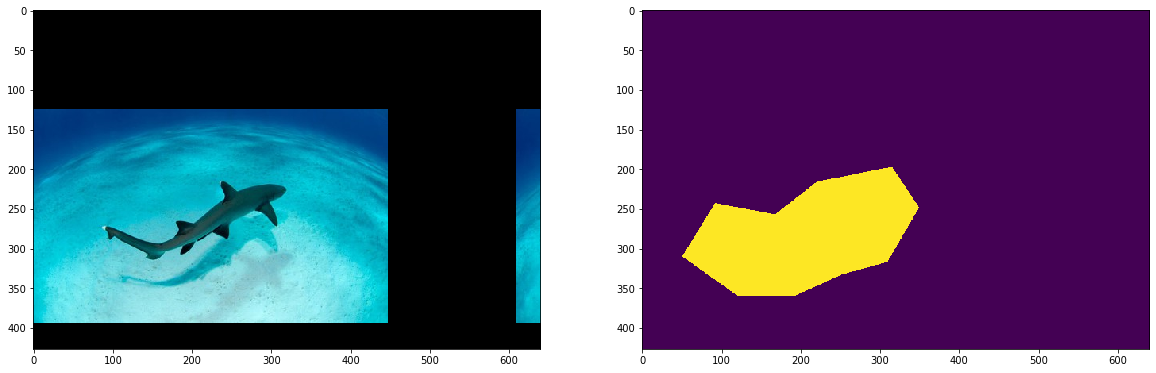

In [13]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(cropped_object)

plt.subplot(122)
plt.imshow(object_mask)


## Part 2 Poisson Blending (50 pts)

In [14]:
def poisson_blend(cropped_object, object_mask, background_img):
    """
    :param cropped_object: numpy.ndarray One you get from align_source
    :param object_mask: numpy.ndarray One you get from align_source
    :param background_img: numpy.ndarray 
    """
    #TO DO 
    
    images = []
    for c in range(3):     
        im_h, im_w, z = cropped_object.shape
        im = cropped_object.copy()
        out_img1  = np.zeros((im_h,im_w,3),dtype =np.float64)

        #https://piazza.com/class/k5cumohrew35en?cid=442

        im2var = np.zeros((im_h, im_w),dtype =np.float64)
        
        var = 0
        for y in range(0,im_h):
            for x in range(0,im_w):

                if (object_mask[y][x] == 1):
                    var = var + 1
                    im2var[y][x] = var

        A = lil_matrix((4*im_h*im_w,im_h*im_w),dtype = np.float64)    

        b = np.zeros((4*im_h*im_w,1),dtype = np.float64)


        e = 0

        A[e][im2var[0][0]] = 1
        b[e] = im[0][0][0]

        e = e + 1

   
        for y in range(0,im_h):
            for x in range(0,im_w):

                if object_mask[y][x]==1:

                    if object_mask[y][x+1]==1:
                        
                        A[e, im2var[y][x+1]] = -1
                        A[e, im2var[y][x]] = 1
                        b[e] =  im[y][x][c] - im[y][x+1][c]          
                        e = e + 1
                    else:
                        A[e, im2var[y][x]] = 1
                        b[e] = im[y][x][c] - im[y][x+1][c] + background_img[y][x+1][c]            
                        e = e + 1

                    if object_mask[y+1][x]==1:
                       
                        A[e, im2var[y+1][x]] = -1
                        A[e, im2var[y][x]] = 1
                        b[e] =  im[y][x][c] - im[y+1][x][c]          
                        e = e + 1
                    else:
                        A[e, im2var[y][x]] = 1
                        b[e] = im[y][x][c] - im[y+1][x][c] + background_img[y+1][x][c]            
                        e = e + 1

                    if object_mask[y][x-1]==1:
                        
                        A[e, im2var[y][x-1]] = -1
                        A[e, im2var[y][x]] = 1
                        b[e] =  im[y][x][c] - im[y][x-1][c]          
                        e = e + 1
                    else:
                        A[e, im2var[y][x]] = 1
                        b[e] = im[y][x][c] - im[y][x-1][c] + background_img[y][x-1][c]            
                        e = e + 1

                    if object_mask[y-1][x]==1:
                        
                        A[e, im2var[y-1][x]] = -1
                        A[e, im2var[y][x]] = 1
                        b[e] =  im[y][x][c] - im[y-1][x][c]          
                        e = e + 1
                    else:
                        A[e, im2var[y][x]] = 1
                        b[e] = im[y][x][c] - im[y-1][x][c] + background_img[y-1][x][c]            
                        e = e + 1

        print('ch:'+str(c)+' constraints calculated')          
        v = lsqr(csr_matrix(A, dtype=np.float64), b, atol=1e-14, btol=1e-14)
        print('ch:'+str(c)+' variables calculated')
        i = 0
        for y in range(0,im_h):
            for x in range(0,im_w):
                if object_mask[y][x]==1:
                    out_img1[y][x][c] = v[0][i]
                    i = i + 1
                else:
                    out_img1[y][x][c] = background_img[y][x][c]
        
        images.append(out_img1)
        
        #plt.imshow(out_img)
    im_out1 = (images[0] + images[1] + images[2])
    return im_out1

ch:0 constraints calculated
ch:0 variables calculated
ch:1 constraints calculated
ch:1 variables calculated
ch:2 constraints calculated
ch:2 variables calculated


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(427, 640, 3)


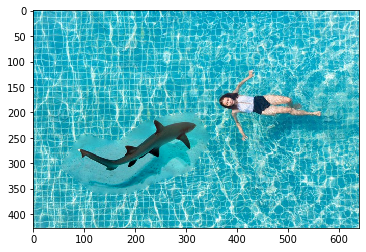

In [15]:
im_blend = poisson_blend(cropped_object, object_mask, background_img)
print(im_blend.shape)
if im_blend.any():
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.imshow(im_blend)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


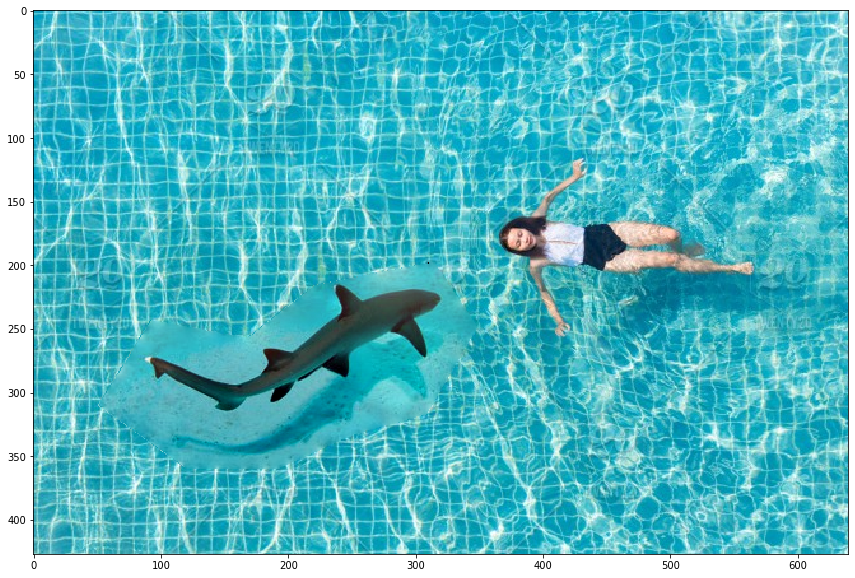

In [16]:
plt.figure(figsize=(25,10))
plt.imshow(im_blend)

## Part 3 Mixed Gradients (20 pts)

In [17]:
def mix_blend(cropped_object, object_mask, background_img):
    """
    :param cropped_object: numpy.ndarray One you get from align_source
    :param object_mask: numpy.ndarray One you get from align_source
    :param background_img: numpy.ndarray 
    """
    #TO DO 
    images = []
    for c in range(3):     
        
        im_h, im_w, z = cropped_object.shape
        im = cropped_object.copy()
        out_img2  = np.zeros((im_h,im_w,3),dtype =np.float64)


        im2var = np.zeros((im_h, im_w),dtype =np.float64)
        
        #https://piazza.com/class/k5cumohrew35en?cid=442
        var = 0
        for y in range(0,object_mask.shape[0]):
            for x in range(0,object_mask.shape[1]):

                if (object_mask[y][x] == 1):
                    var = var + 1
                    im2var[y][x] = var

        A = lil_matrix((4*im_h*im_w,im_h*im_w),dtype = np.float64)    

        b = np.zeros((4*im_h*im_w,1),dtype = np.float64)


        e = 0

        A[e][im2var[0][0]] = 1
        b[e] = im[0][0][0]

        e = e + 1

   
        for y in range(0,im_h):
            for x in range(0,im_w):
                
                if object_mask[y][x]==1:
                    
                    
                    if object_mask[y][x+1]==1:

                        A[e, im2var[y][x+1]] = -1                       #check right
                        A[e, im2var[y][x]] = 1

                        if abs(im[y][x][c] - im[y][x+1][c]) > abs(background_img[y][x][c]- background_img[y][x+1][c]):  
                            b[e] = im[y][x][c]- im[y][x+1][c]
                        else:
                            b[e] = background_img[y][x][c] - background_img[y][x+1][c]
                        e = e + 1
                    else:
                        A[e, im2var[y][x]] = 1

                        if abs(im[y][x][c] - im[y][x+1][c]) > abs(background_img[y][x][c]- background_img[y][x+1][c]):
                            b[e] = (im[y][x][c]- im[y][x+1][c]) + background_img[y][x+1][c]
                        else:
                            b[e] = (background_img[y][x][c] - background_img[y][x+1][c]) + background_img[y][x+1][c]
                        e = e + 1

                    if object_mask[y+1][x]==1:

                        A[e, im2var[y+1][x]] = -1                       #check down 
                        A[e, im2var[y][x]] = 1

                        if abs(im[y][x][c] - im[y+1][x][c]) > abs(background_img[y][x][c]- background_img[y+1][x][c]):  
                            b[e] = im[y][x][c]- im[y+1][x][c]
                        else:
                            b[e] = background_img[y][x][c] - background_img[y+1][x][c]
                        e = e + 1
                    else:
                        A[e, im2var[y][x]] = 1


                        if abs(im[y][x][c] - im[y+1][x][c]) > abs(background_img[y][x][c]- background_img[y+1][x][c]):
                            b[e] = (im[y][x][c]- im[y+1][x][c]) + background_img[y+1][x][c]
                        else:
                            b[e] = (background_img[y][x][c] - background_img[y+1][x][c]) + background_img[y+1][x][c]
                        e = e + 1

                    if object_mask[y][x-1]==1:

                        
                        A[e, im2var[y][x-1]] = -1                       #check left
                        A[e, im2var[y][x]] = 1

                        if abs(im[y][x][c] - im[y][x-1][c]) > abs(background_img[y][x][c]- background_img[y][x-1][c]):
                            b[e] = im[y][x][c]- im[y][x-1][c] 
                        else:
                            b[e] = background_img[y][x][c] - background_img[y][x-1][c] 
                        e = e + 1
                    else:
                        A[e, im2var[y][x]] = 1

                        if abs(im[y][x][c] - im[y][x-1][c]) > abs(background_img[y][x][c]- background_img[y][x-1][c]):
                            b[e] = (im[y][x][c]- im[y][x-1][c]) + background_img[y][x-1][c]
                        else:
                            b[e] = (background_img[y][x][c] - background_img[y][x-1][c]) + background_img[y][x-1][c]
                        e = e + 1

                    if object_mask[y-1][x]==1:
                        A[e, im2var[y-1][x]] = -1                       #check up
                        A[e, im2var[y][x]] = 1

                        if abs(im[y][x][c] - im[y-1][x][c]) > abs(background_img[y][x][c]- background_img[y-1][x][c]):  
                            b[e] = im[y][x][c]- im[y-1][x][c]
                        else:
                            b[e] = background_img[y][x][c] - background_img[y-1][x][c]
                        e = e + 1
                    else:
                        A[e, im2var[y][x]] = 1

                        if abs(im[y][x][c] - im[y-1][x][c]) > abs(background_img[y][x][c]- background_img[y-1][x][c]):  
                            b[e] = (im[y][x][c]- im[y-1][x][c]) + background_img[y-1][x][c]
                        else:
                            b[e] = (background_img[y][x][c] - background_img[y-1][x][c]) + background_img[y-1][x][c]                  
                        e = e + 1
        print('ch:'+str(c)+' constraints calculated')          
        v = lsqr(csr_matrix(A, dtype=np.float64), b, atol=1e-14, btol=1e-14)
        print('ch:'+str(c)+' variables calculated')
        i = 0
        for y in range(0,im_h):
            for x in range(0,im_w):
                if object_mask[y][x]==1:
                    out_img2[y][x][c] = v[0][i]
                    i = i + 1
                else:
                    out_img2[y][x][c] = background_img[y][x][c]
        
        images.append(out_img2)
        
        #plt.imshow(out_img)
    im_out2 = (images[0] + images[1] + images[2])
    return im_out2
    


ch:0 constraints calculated
ch:0 variables calculated
ch:1 constraints calculated
ch:1 variables calculated
ch:2 constraints calculated
ch:2 variables calculated


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


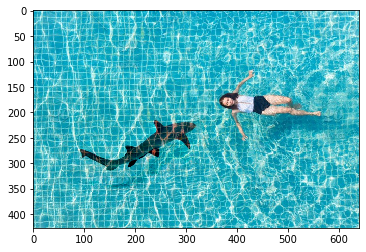

In [18]:
im_mix = mix_blend(cropped_object, object_mask, background_img)
if im_mix.any():
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.imshow(im_mix)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


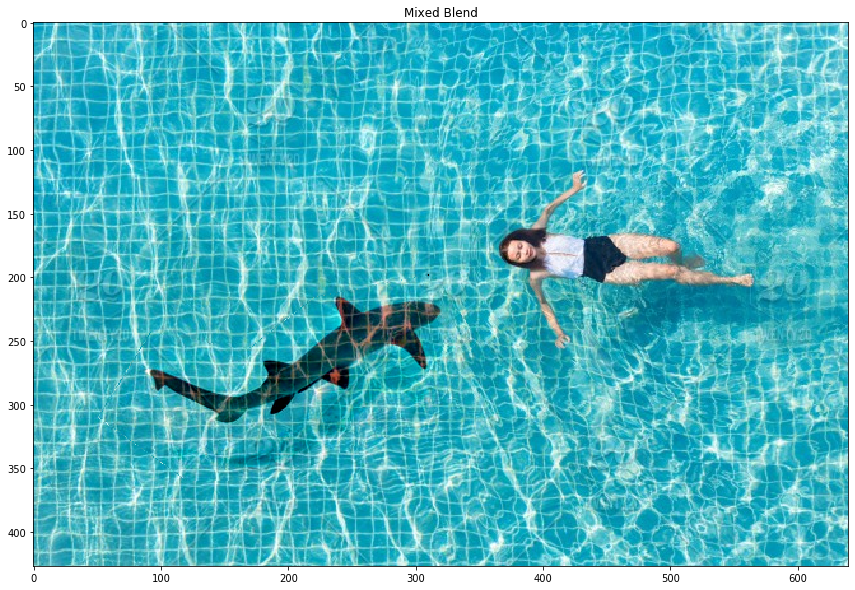

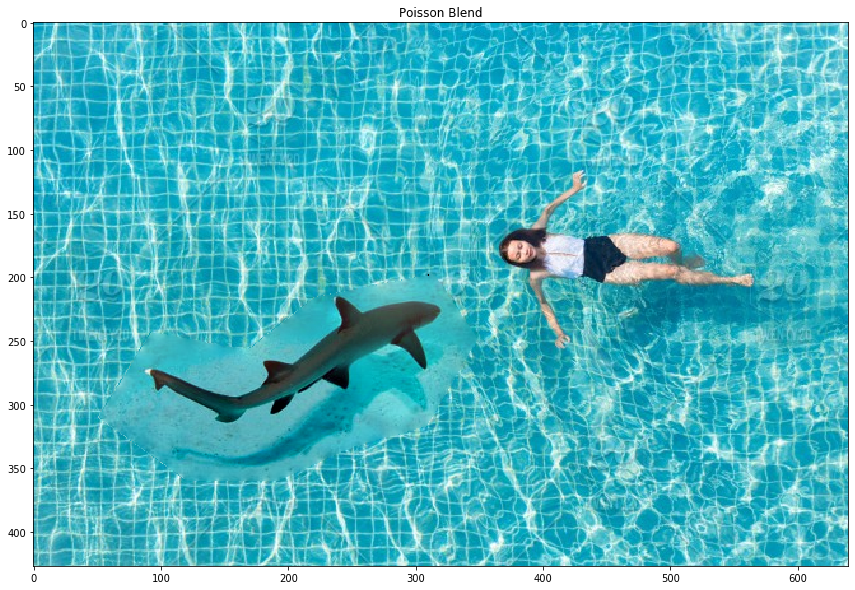

In [19]:
plt.figure(figsize=(25,10))
plt.title('Mixed Blend')
plt.imshow(im_mix)

plt.figure(figsize=(25,10))
plt.title('Poisson Blend')
plt.imshow(im_blend)

# Bells & Whistles (Extra Points)

## Color2Gray (20 pts)

In [20]:
def color2gray(im):
    
    im_h, im_w, z = im.shape
    #im = img.copy()
    im2var = np.arange(im_h * im_w).reshape(im_h, im_w)
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    
    A = lil_matrix((2*im_h*im_w - (im_h + im_w) + 1,im_h*im_w),dtype = np.float64)
    b = np.zeros((2*im_h*im_w - (im_h + im_w) + 1,1),dtype = np.float64)
    
    e = 0
    
    A[e][im2var[0][0]] = 1
    b[e]= im_gray[0][0]
    
    e = e + 1
    
    for y in range(0,im_h):
        for x in range(0,im_w):          
            
            
            if x+1 < im_w:
                A[e, im2var[y][x+1]] = 1
                A[e, im2var[y][x]] = -1
                
                for rows in range(len(im[y][x+1])):
                    grad = 0
                    if abs(im[y][x+1]-im[y][x]).any() > abs(grad):
                        grad = im[y][x+1][rows]- im[y][x][rows]
                b[e] = grad
                e = e + 1
                
                        
            if y+1 < im_h:
                A[e,im2var[y + 1][x]] = 1
                A[e, im2var[y][x]] = -1
                for rows in range(len(im[y+1][x])):
                    grad = 0
                    if abs(im[y+1][x]-im[y][x]).any() > abs(grad):
                        grad = im[y+1][x][rows] - im[y][x][rows]
                b[e] = grad
                e = e + 1
            
    v = lsqr(csr_matrix(A, dtype=np.float64), b)
    out_img = np.resize(v[0],(im_h, im_w))
    #out_img = np.stack((out_img, out_img, out_img), axis=2)
    
    return out_img
    

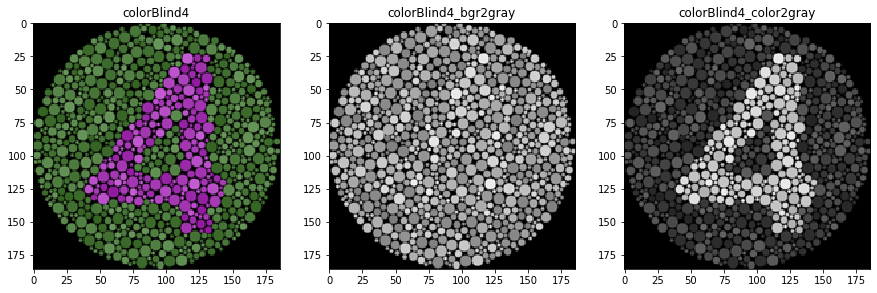

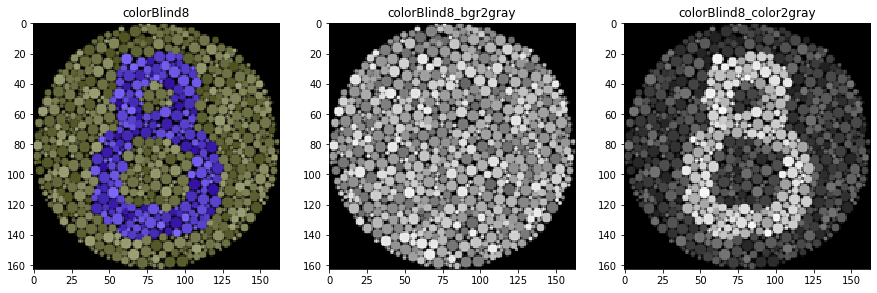

In [21]:
im_c2g1 = cv2.imread("samples\colorBlind4.png")
im_c2g2 = cv2.imread("samples\colorBlind8.png")

im_c2g1_gray = cv2.cvtColor(im_c2g1,cv2.COLOR_BGR2GRAY)
im_c2g2_gray = cv2.cvtColor(im_c2g2,cv2.COLOR_BGR2GRAY)

im_out1 = color2gray(im_c2g1.astype('float32'))
im_out2 = color2gray(im_c2g2.astype('float32'))

plt.figure(figsize =(15,10))
plt.subplot(131)
plt.title('colorBlind4')
plt.imshow(im_c2g1)
plt.subplot(132)
plt.title('colorBlind4_bgr2gray')
plt.imshow(im_c2g1_gray, cmap = 'gray')
plt.subplot(133)
plt.title('colorBlind4_color2gray')
plt.imshow(im_out1, cmap = 'gray')

plt.figure(figsize =(15,10))
plt.subplot(131)
plt.title('colorBlind8')
plt.imshow(im_c2g2)
plt.subplot(132)
plt.title('colorBlind8_bgr2gray')
plt.imshow(im_c2g2_gray, cmap = 'gray')
plt.subplot(133)
plt.title('colorBlind8_color2gray')
plt.imshow(im_out2, cmap = 'gray')

## Laplacian pyramid blending (20 pts)

In [22]:
def laplacian_blend(background_img,cropped_object,object_mask):

    
   #1. Build Laplacian pyramids for each image

    cutoff_low = 15
    lpf_low = utils_proj1.gaussian_kernel(cutoff_low, 3*cutoff_low)

    im_A = cropped_object.copy()
    im_B = background_img.copy()   
    
    scale = 0.
  
    
    im_gA1 = cv2.filter2D(im_A, -1,lpf_low).astype(np.float32)
    im_subA1 = cv2.resize(im_gA1,(int((im_gA1.shape[0]+1)/2),int((im_gA1.shape[1]+1)/2)))
    
    im_gA2 = cv2.filter2D(im_subA1,-1,lpf_low).astype(np.float32)
    im_subA2 = cv2.resize(im_gA2,(int((im_gA2.shape[0]+1)/2),int((im_gA2.shape[1]+1)/2)))
    
    im_gA3 = cv2.filter2D(im_subA2,-1,lpf_low).astype(np.float32)
    im_subA3 = cv2.resize(im_gA3,(int((im_gA3.shape[0]+1)/2),int((im_gA3.shape[1]+1)/2)))
    
    im_gA4 = cv2.filter2D(im_subA3,-1,lpf_low).astype(np.float32)
    im_gA5 = cv2.resize(im_gA4,(int((im_gA4.shape[0]+1)/2),int((im_gA4.shape[1]+1)/2)))
    
    im_gB1 = cv2.filter2D(im_B, -1,lpf_low).astype(np.float32)
    im_subB1 = cv2.resize(im_gB1,(int((im_gB1.shape[0]+1)/2),int((im_gB1.shape[1]+1)/2)))
    
    im_gB2 = cv2.filter2D(im_subB1,-1,lpf_low).astype(np.float32)
    im_subB2 = cv2.resize(im_gB2,(int((im_gB2.shape[0]+1)/2),int((im_gB2.shape[1]+1)/2)))
    
    im_gB3 = cv2.filter2D(im_subB2,-1,lpf_low).astype(np.float32)
    im_subB3 = cv2.resize(im_gB3,(int((im_gB3.shape[0]+1)/2),int((im_gB3.shape[1]+1)/2)))
    
    im_gB4 = cv2.filter2D(im_subB3,-1,lpf_low).astype(np.float32)
    im_gB5 = cv2.resize(im_gB4,(int((im_gB4.shape[0]+1)/2),int((im_gB4.shape[1]+1)/2)))


    
    im_lA1 = im_A - im_gA1    
    im_lA2 = im_subA1 - im_gA2  
    im_lA3 = im_subA2 - im_gA3
    im_lA4 = im_subA3 - im_gA4 
                        


    
    im_lB1 = im_B - im_gB1    
    im_lB2 = im_subB1 - im_gB2
    im_lB3 = im_subB2 - im_gB3
    im_lB4 = im_subB3 - im_gB4


    
    #2. Build a Gaussian pyramid of region mask
    
    M = np.zeros_like(cropped_object)
    for i in range(3): 
        M[:,:,i] = object_mask.copy()
    

#     for row in range(0,M.shape[0]):
#         for col in range(0,M.shape[1]):
#             if(object_mask[row][col] == True):
#                 M[row][col] = 1

    M1 = cv2.filter2D(M, -1,lpf_low).astype(np.float32) ###
    im_subM1 = cv2.resize(M1,(int((M1.shape[0]+1)/2),int((M1.shape[1]+1)/2)))
    M2 = cv2.filter2D(im_subM1, -1,lpf_low).astype(np.float32) ###
    im_subM2 = cv2.resize(M2,(int((M2.shape[0]+1)/2),int((M2.shape[1]+1)/2)))
    M3 = cv2.filter2D(im_subM2, -1,lpf_low).astype(np.float32) ###
    im_subM3 = cv2.resize(M3,(int((M3.shape[0]+1)/2),int((M3.shape[1]+1)/2)))    
    M4 = cv2.filter2D(im_subM3, -1,lpf_low).astype(np.float32) ###
    
    #3. Blend each level of pyramid using region mask from the same level
    
    L1 = im_lA1*M1.astype(np.float32) + (1-M1)*im_lB1.astype(np.float32)
    L2 = im_lA2*M2.astype(np.float32) + (1-M2)*im_lB2.astype(np.float32)
    L3 = im_lA3*M3.astype(np.float32) + (1-M3)*im_lB3.astype(np.float32)
    L4 = im_lA4*M4.astype(np.float32) + (1-M4)*im_lB4.astype(np.float32)
    
    #4. Collapse the pyramid to get the final blended image


    L4_up = cv2.resize(L4,(L3.shape[1],L3.shape[0]))
    
    im_L3 = L3 + L4_up
    
    im_L2 = L2 + cv2.resize(im_L3, (L2.shape[1],L2.shape[0]))
    
    im_L1 = L1 + cv2.resize(im_L2, (L1.shape[1],L1.shape[0]))
    
# #     L2_up = cv2.resize(L2,(L1.shape[1],L1.shape[0]))
# #     L3_up = cv2.resize(L3,(L2.shape[1],L2.shape[0]))

#     plt.figure(figsize = (15,10))
#     plt.subplot(141)
#     plt.imshow(im_lA1)
#     plt.subplot(142)
#     plt.imshow(im_lA2)
#     plt.subplot(143)
#     plt.imshow(im_lA3)
#     plt.subplot(144)
#     plt.imshow(im_lA4)
    
#     plt.figure(figsize = (15,10))
#     plt.subplot(141)
#     plt.imshow(im_lB1)
#     plt.subplot(142)
#     plt.imshow(im_lB2)
#     plt.subplot(143)
#     plt.imshow(im_lB3)
#     plt.subplot(144)
#     plt.imshow(im_lB4)
    
#     plt.figure(figsize = (15,10))
#     plt.subplot(141)
#     plt.imshow(M1)
#     plt.subplot(142)
#     plt.imshow(M2)
#     plt.subplot(143)
#     plt.imshow(M3)
#     plt.subplot(144)
#     plt.imshow(M4)
    
    final = im_L1
    
    return final
    
    
    
    
    
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


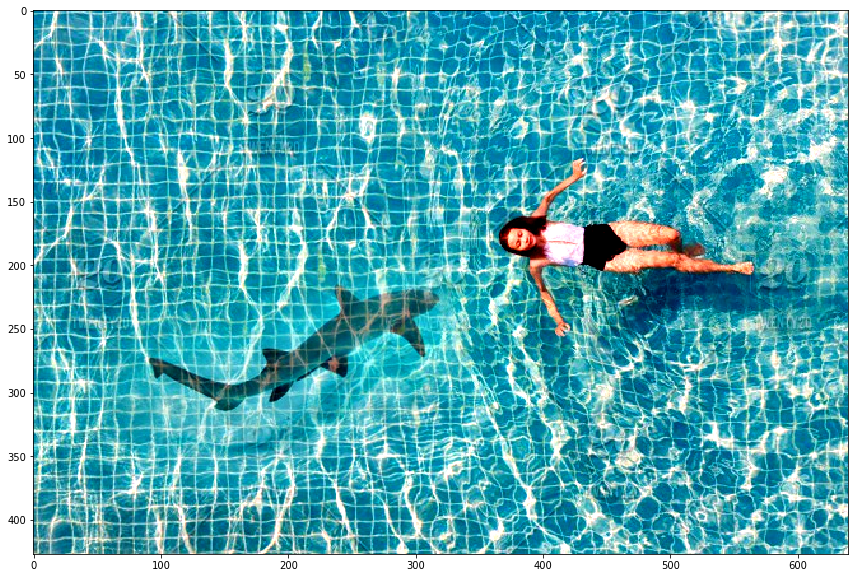

In [24]:
im_lpyr = laplacian_blend(background_img,cropped_object,object_mask)
plt.figure(figsize=(25,10))
plt.imshow((im_lpyr + background_img)/1.1 )
